In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
np.float32(np.exp(20))

from mavenn.src.layers.measurement_process_layers import Log
Log(np.float32(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=0.6931472>

In [3]:
import tensorflow as tf
tf.where([True, False], [1, 2], 50)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 50], dtype=int32)>

In [4]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')
data_df.head(20)

,training_set,tot_ct,ex_ct,y,x
0,True,1588,66,-4.567814,ACGGUCCAU
1,True,1533,118,-3.688265,AUUGCCAGG
2,True,1459,399,-1.867896,ACAGCGGUA
3,True,1414,246,-2.518219,AACGCCAGG
4,True,1412,60,-4.533808,ACGGCUUGG
5,True,1412,11147,2.979952,AAGGUGGGA
6,True,1396,57,-4.590135,ACGGCUUAU
7,False,1384,14692,3.407171,CAGGUGGGA
8,False,1378,12990,3.235818,AAGGUUGGU
9,True,1336,43,-4.925352,UCAGUGGGA


<AxesSubplot:xlabel='y', ylabel='Count'>

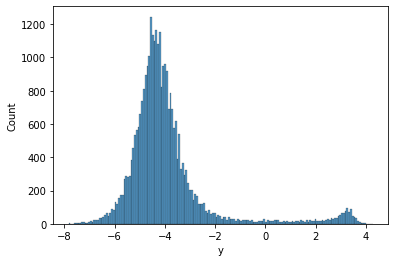

In [5]:
import seaborn as sns
sns.histplot(data_df['y'])

In [6]:
# Split into trianing and test data
ix = data_df['training_set']
L = len(data_df['x'][0])
train_df = data_df[ix]
print(f'training N: {len(train_df):,}')
test_df = data_df[~ix]
print(f'testing N: {len(test_df):,}')

training N: 24,411
testing N: 6,079


In [7]:
# Set seeed
mavenn.set_seed(0)

# Define model
model = mavenn.Model(regression_type='GE',
                     L=L,
                     alphabet='rna',
                     gpmap_type='pairwise',                     
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=4)


In [8]:
# Set training data
model.set_data(x=train_df['x'],
               y=train_df['y'],
               shuffle=True)

N = 24,411 observations set as training data.
Data shuffled.
Time to set data: 0.439 sec.


In [9]:
# Fit model to data
history = model.fit(learning_rate=.005,
                    epochs=1000,
                    batch_size=200,
                    early_stopping=True,
                    early_stopping_patience=30,
                    linear_initialization=False)

Epoch 1/1000
98/98 [==============================] - 1s 8ms/step - loss: 228.8042 - I_like: -0.2426 - val_loss: 193.2352 - val_I_like: -0.0111
Epoch 2/1000
98/98 [==============================] - 0s 4ms/step - loss: 181.0735 - I_like: 0.0877 - val_loss: 169.3665 - val_I_like: 0.1607
Epoch 3/1000
98/98 [==============================] - 0s 3ms/step - loss: 167.1879 - I_like: 0.1900 - val_loss: 163.5880 - val_I_like: 0.2036
Epoch 4/1000
98/98 [==============================] - 0s 4ms/step - loss: 163.3864 - I_like: 0.2164 - val_loss: 162.1058 - val_I_like: 0.2129
Epoch 5/1000
98/98 [==============================] - 0s 4ms/step - loss: 161.9169 - I_like: 0.2280 - val_loss: 161.3826 - val_I_like: 0.2203
Epoch 6/1000
98/98 [==============================] - 0s 5ms/step - loss: 160.8463 - I_like: 0.2350 - val_loss: 160.1009 - val_I_like: 0.2294
Epoch 7/1000
98/98 [==============================] - 0s 4ms/step - loss: 160.4202 - I_like: 0.2389 - val_loss: 160.1660 - val_I_like: 0.2288
Epoc

98/98 [==============================] - 0s 4ms/step - loss: 157.9702 - I_like: 0.2527 - val_loss: 158.0602 - val_I_like: 0.2420
Epoch 59/1000
98/98 [==============================] - 0s 4ms/step - loss: 157.5341 - I_like: 0.2572 - val_loss: 158.7911 - val_I_like: 0.2388
Epoch 60/1000
98/98 [==============================] - 0s 4ms/step - loss: 157.6117 - I_like: 0.2565 - val_loss: 158.0665 - val_I_like: 0.2435
Epoch 61/1000
98/98 [==============================] - 0s 4ms/step - loss: 157.5279 - I_like: 0.2563 - val_loss: 157.8209 - val_I_like: 0.2448
Epoch 62/1000
98/98 [==============================] - 0s 4ms/step - loss: 157.4804 - I_like: 0.2594 - val_loss: 158.1922 - val_I_like: 0.2418
Epoch 63/1000
98/98 [==============================] - 0s 4ms/step - loss: 157.2054 - I_like: 0.2601 - val_loss: 158.0729 - val_I_like: 0.2428
Epoch 64/1000
98/98 [==============================] - 0s 4ms/step - loss: 157.1379 - I_like: 0.2607 - val_loss: 158.0810 - val_I_like: 0.2447
Epoch 65/1000

In [10]:
import tensorflow as tf
import tensorflow.keras.backend as K
x = tf.constant(100.)
y = tf.constant(1.E20)
K.min([K.exp(x), y]) 

<tf.Tensor: shape=(), dtype=float32, numpy=1e+20>

In [11]:
# Save model
model.save('mpsa_ge_pairwise')

Model saved to these files:
	mpsa_ge_pairwise.pickle
	mpsa_ge_pairwise.h5


In [12]:
# Load model
model = mavenn.load('mpsa_ge_pairwise')

Model loaded from these files:
	mpsa_ge_pairwise.pickle
	mpsa_ge_pairwise.h5


In [13]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

On test data:
I_like_test: 0.263 +- 0.025 bits
I_pred_test: 0.373 +- 0.013 bits


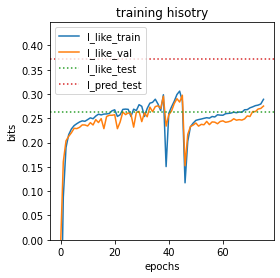

In [14]:
# Show training history
print('On test data:')

# Compute likelihood information
I_like, dI_like =  model.I_likelihood(x=x_test, y=y_test)
print(f'I_like_test: {I_like:.3f} +- {dI_like:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_like_hist = model.history['I_like']
val_I_like_hist = model.history['val_I_like']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_like_hist, label='I_like_train')
ax.plot(val_I_like_hist, label='I_like_val')
ax.axhline(I_like, color='C2', linestyle=':', label='I_like_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

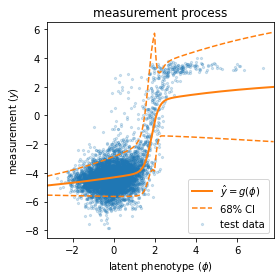

In [15]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

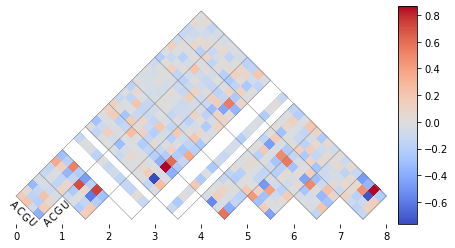

In [16]:
# Plot pairwise parameters
theta = model.get_theta()
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
mavenn.heatmap_pairwise(values=theta['theta_lclc'],
                        alphabet=theta['alphabet'],
                        ax=ax);

In [17]:
# Test simulate_data
sim_df = model.simulate_dataset(N=1000)
sim_df.head()

,training_set,yhat,phi,y,x
0,True,-4.365805,-0.264129,-4.193307,AGCGCAGGU
1,True,-4.626673,-1.671060,-4.800386,UCGGCCUAA
2,True,-4.322954,-0.052982,-4.028783,GUCGCACCC
3,True,-4.551327,-1.241051,-4.509951,UUAGCAGAA
4,True,-4.533278,-1.141080,-4.397208,UAUGUUUGG
